In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import pandas as pd
from pathlib import Path
from importlib import reload

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

import TreeMazeAnalyses2,Analyses.tree_maze_functions as tmf
import TreeMazeAnalyses2.Analyses.experiment_info as ei
import TreeMazeAnalyses2.Analyses.plot_functions as pf
import TreeMazeAnalyses2.Utils.robust_stats as rs

import ipywidgets as widgets
from ipywidgets import interact, fixed, interact_manual

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [5]:
ei = reload(ei)
info = ei.SummaryInfo()


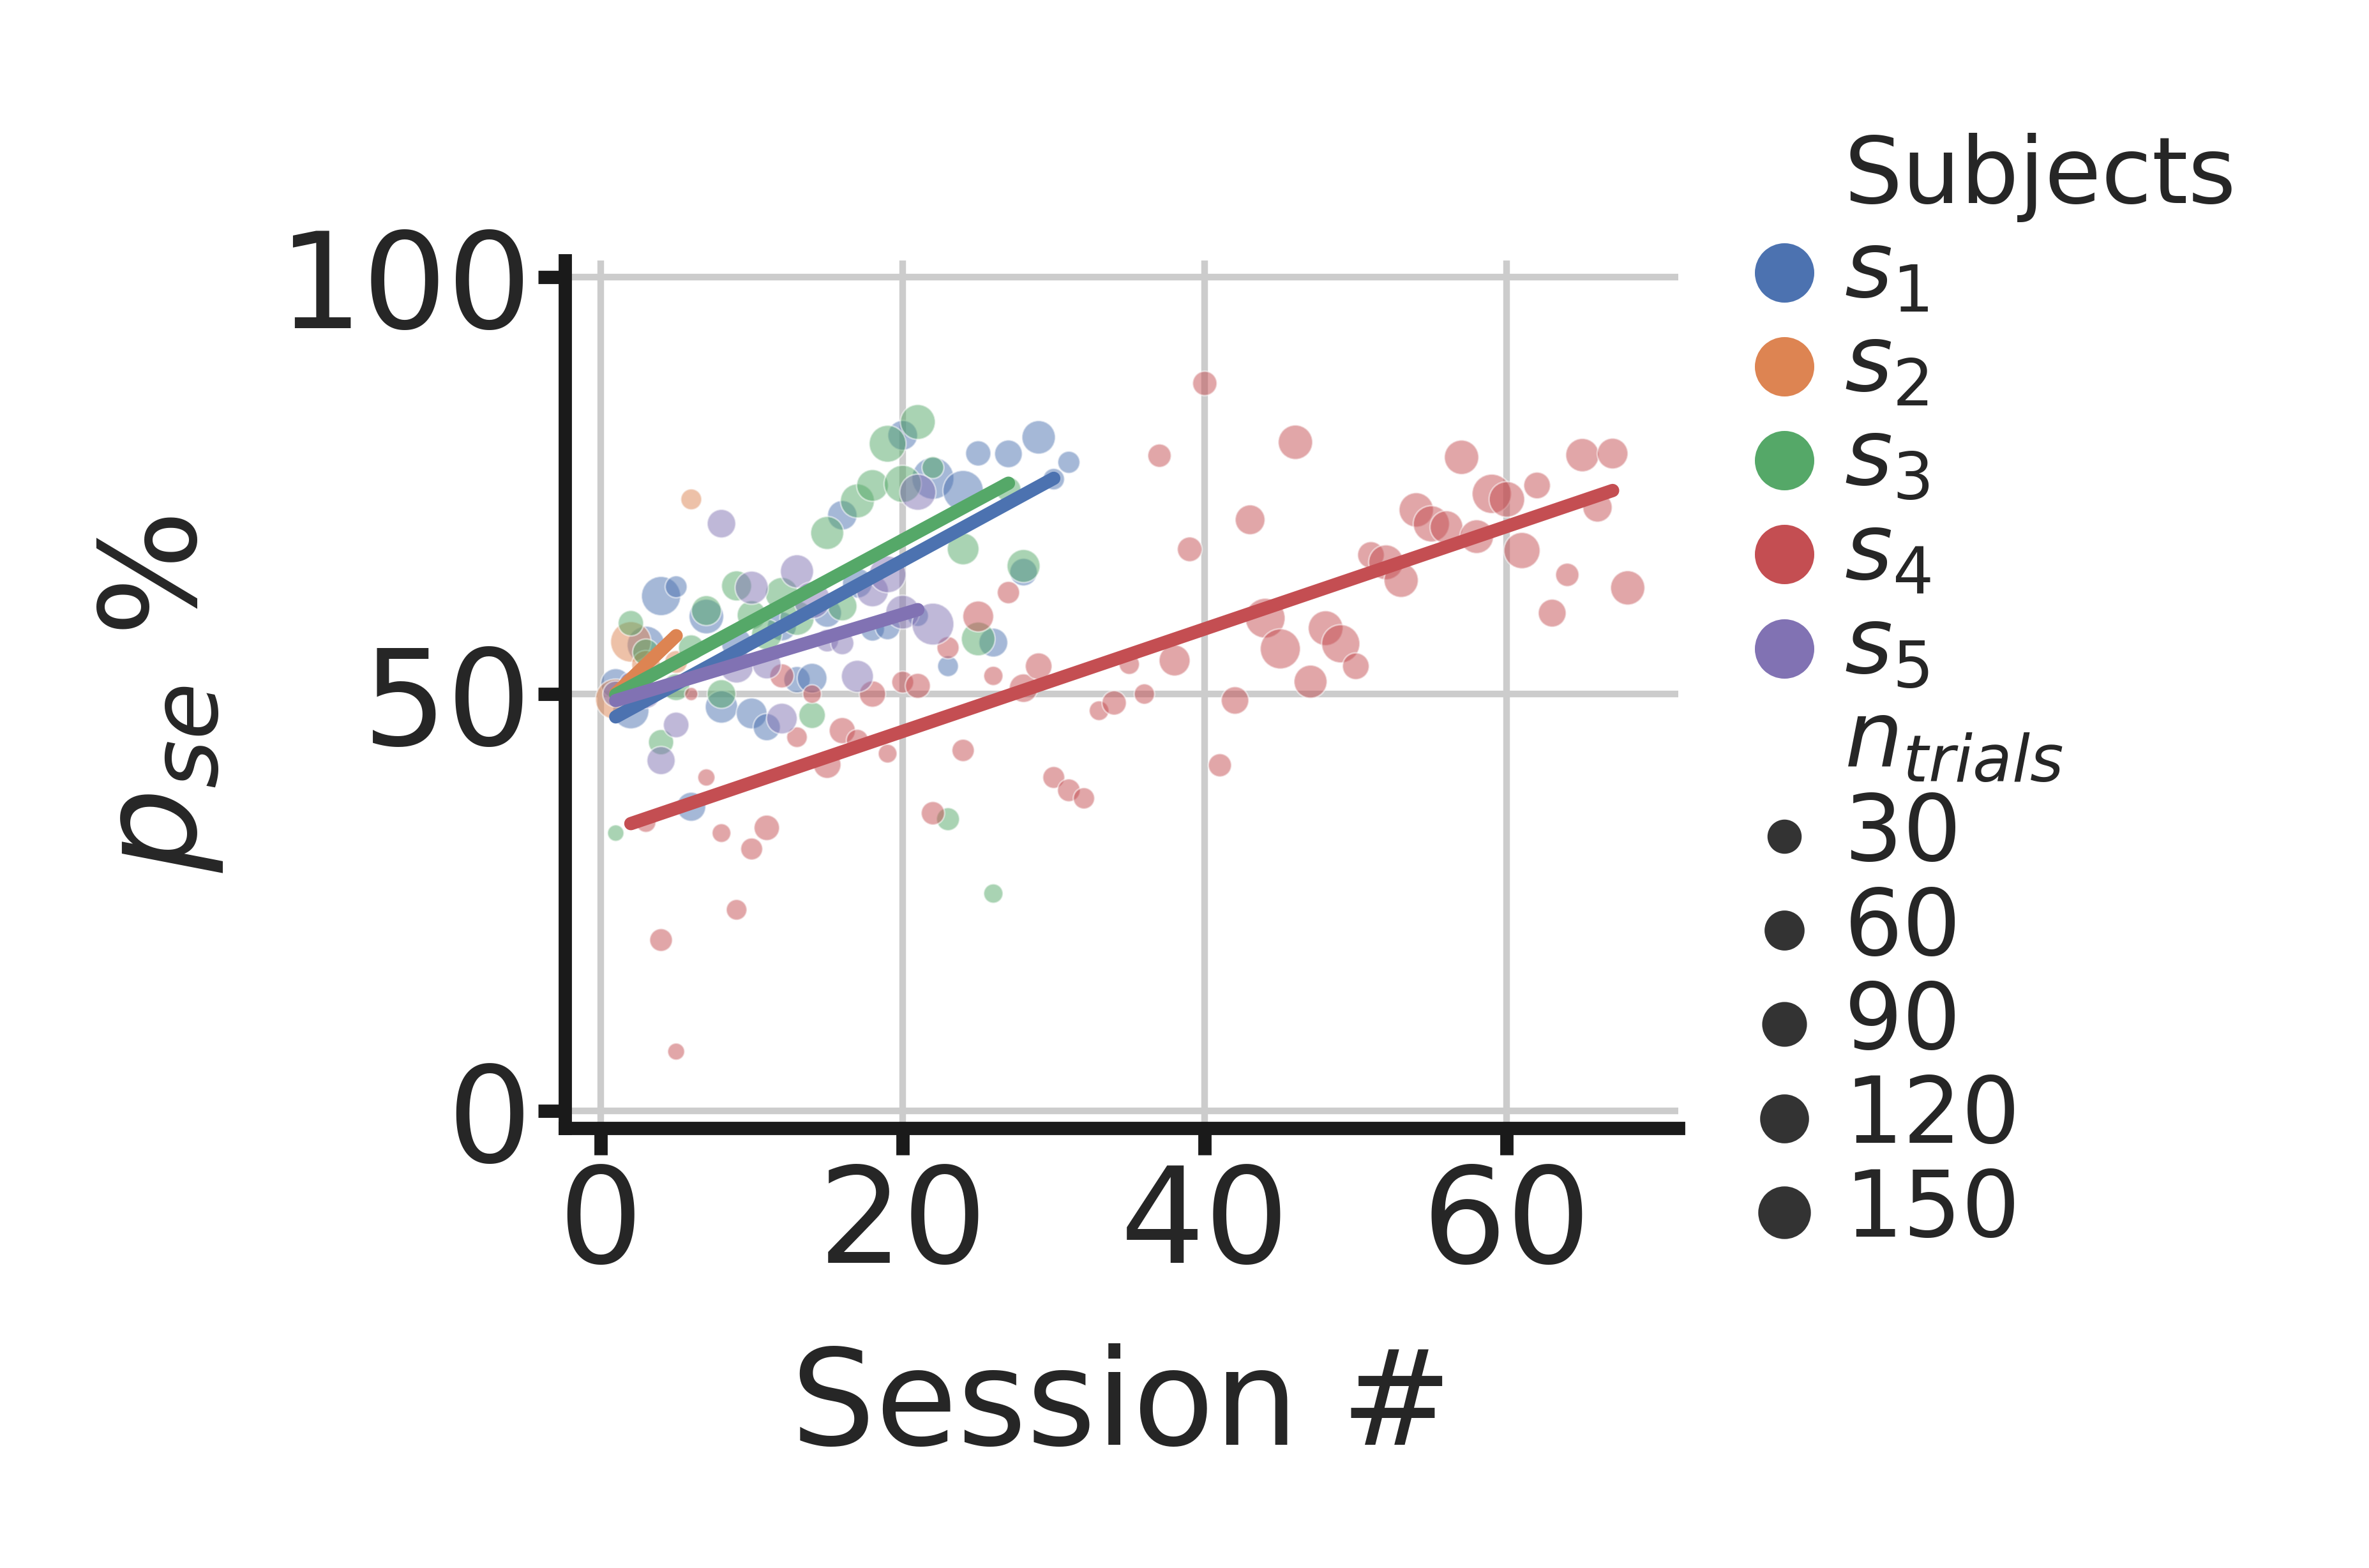

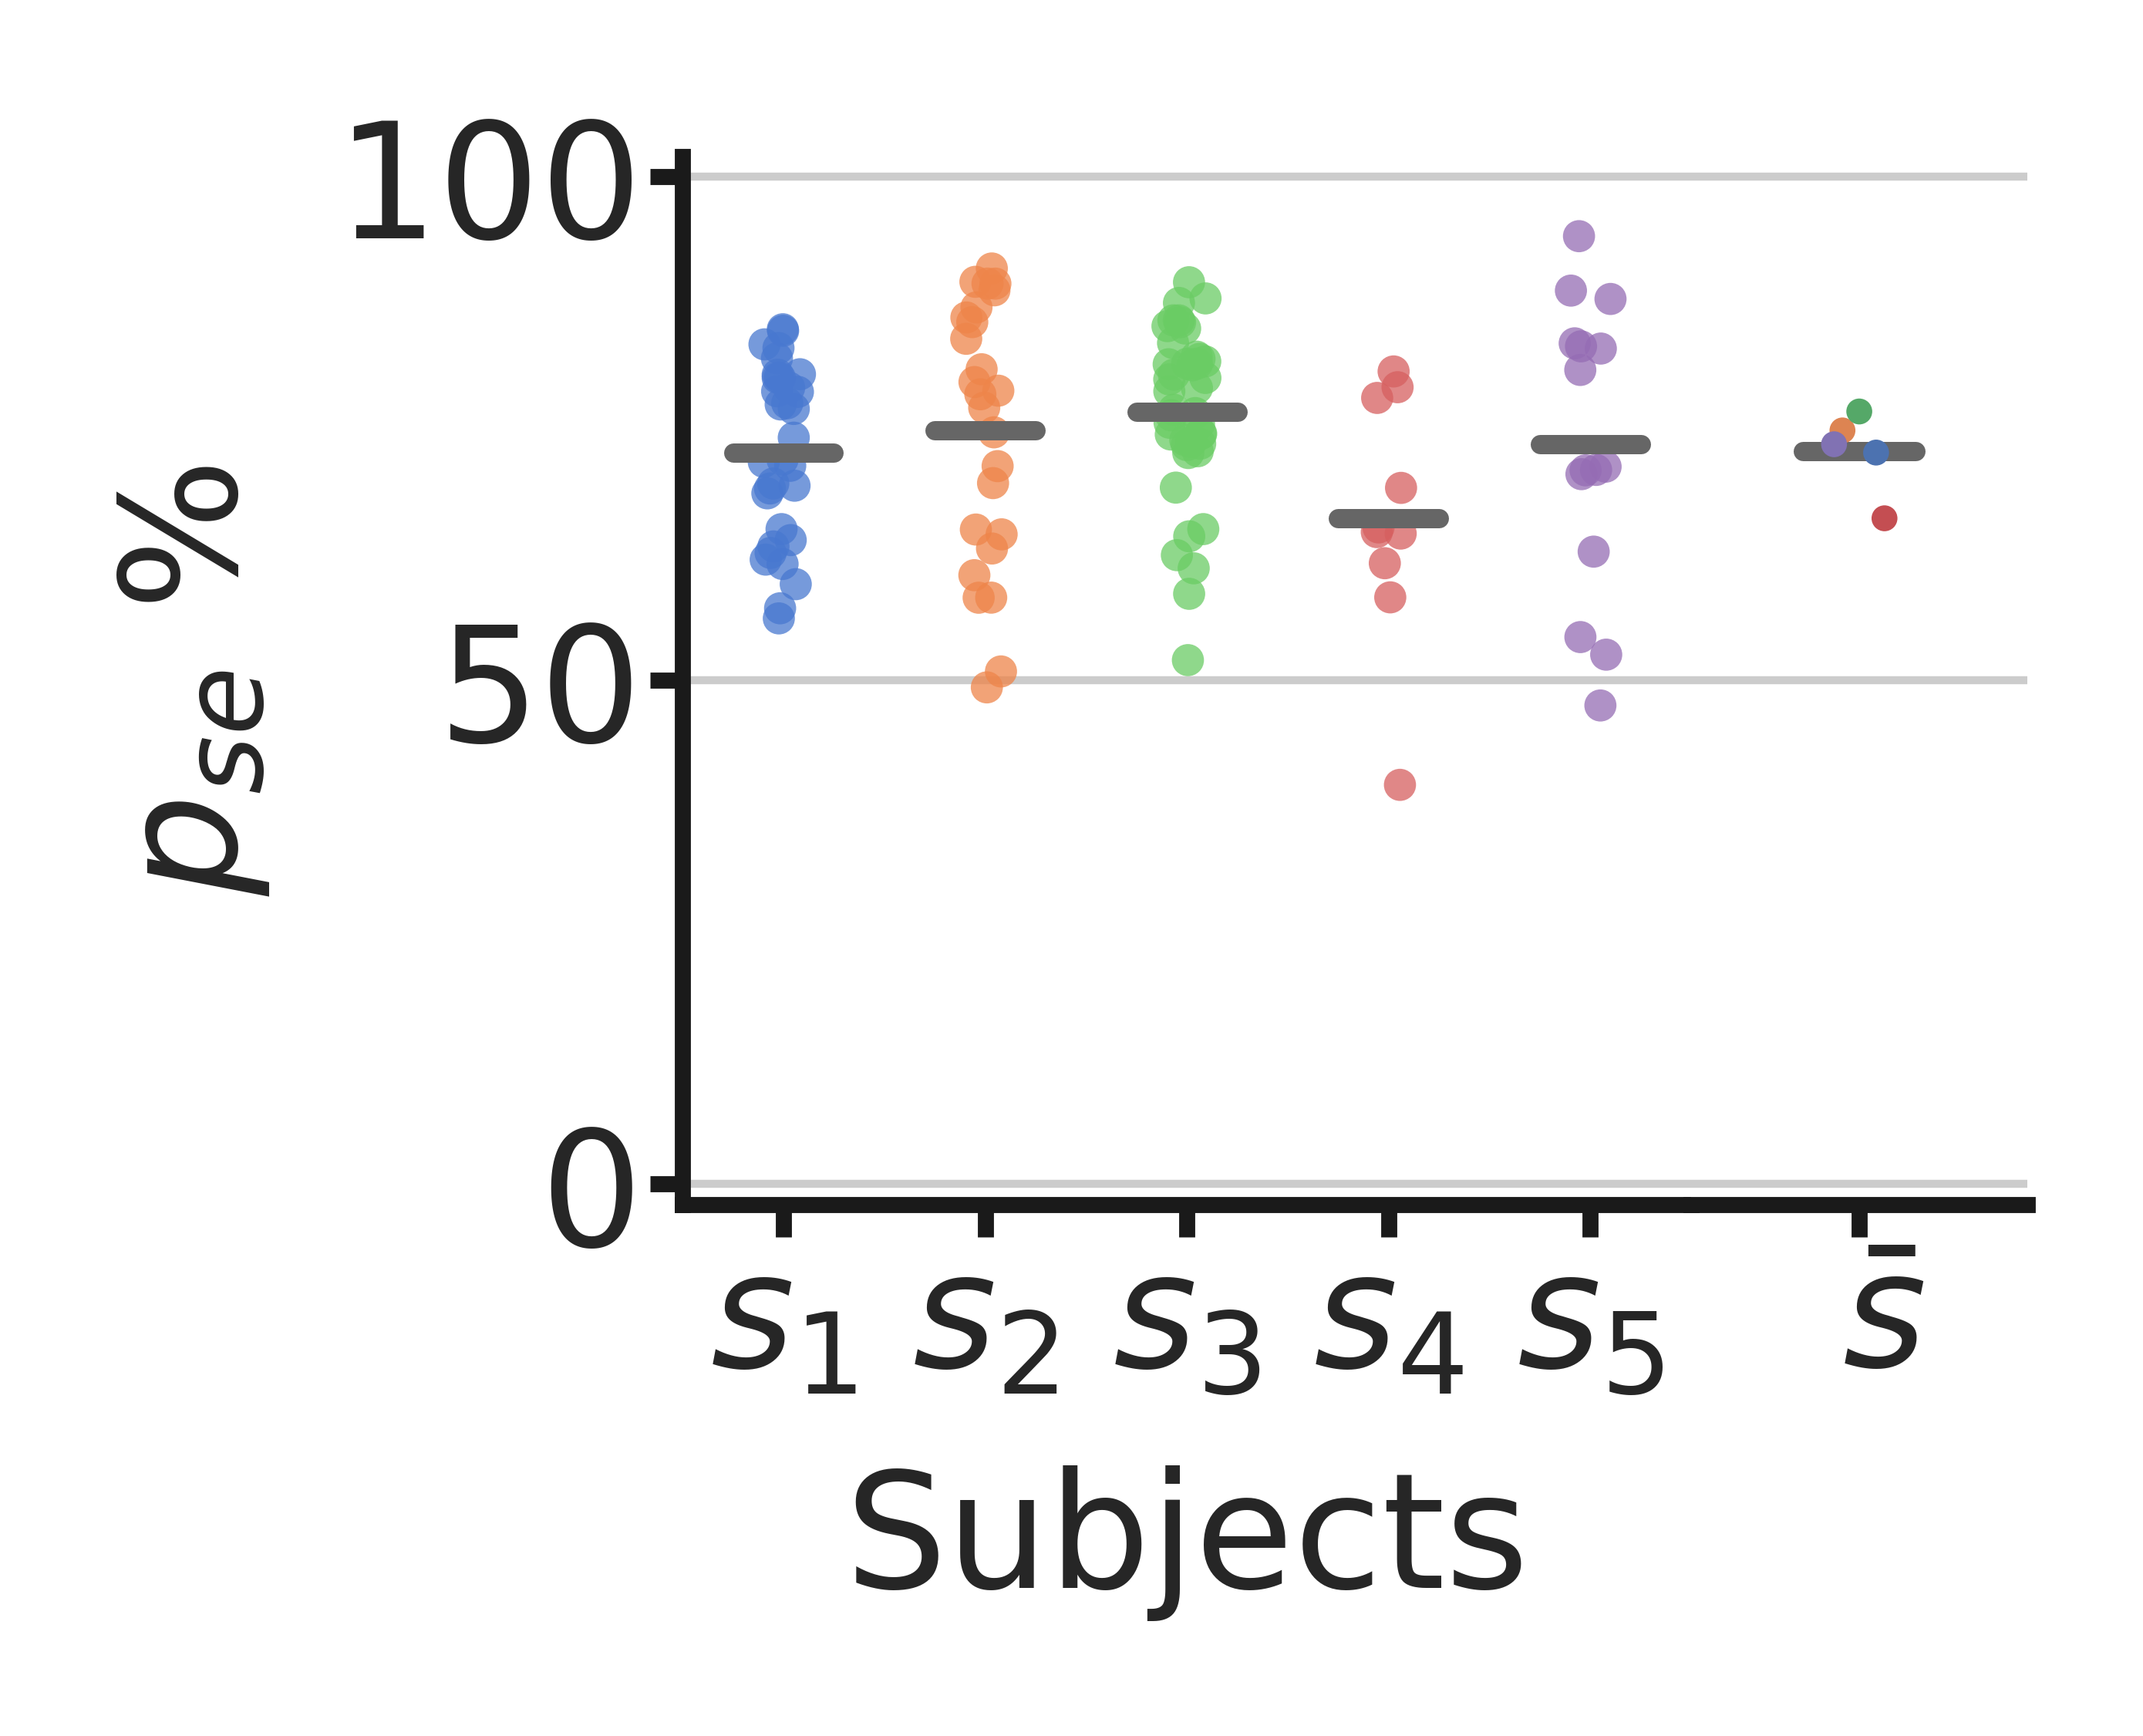

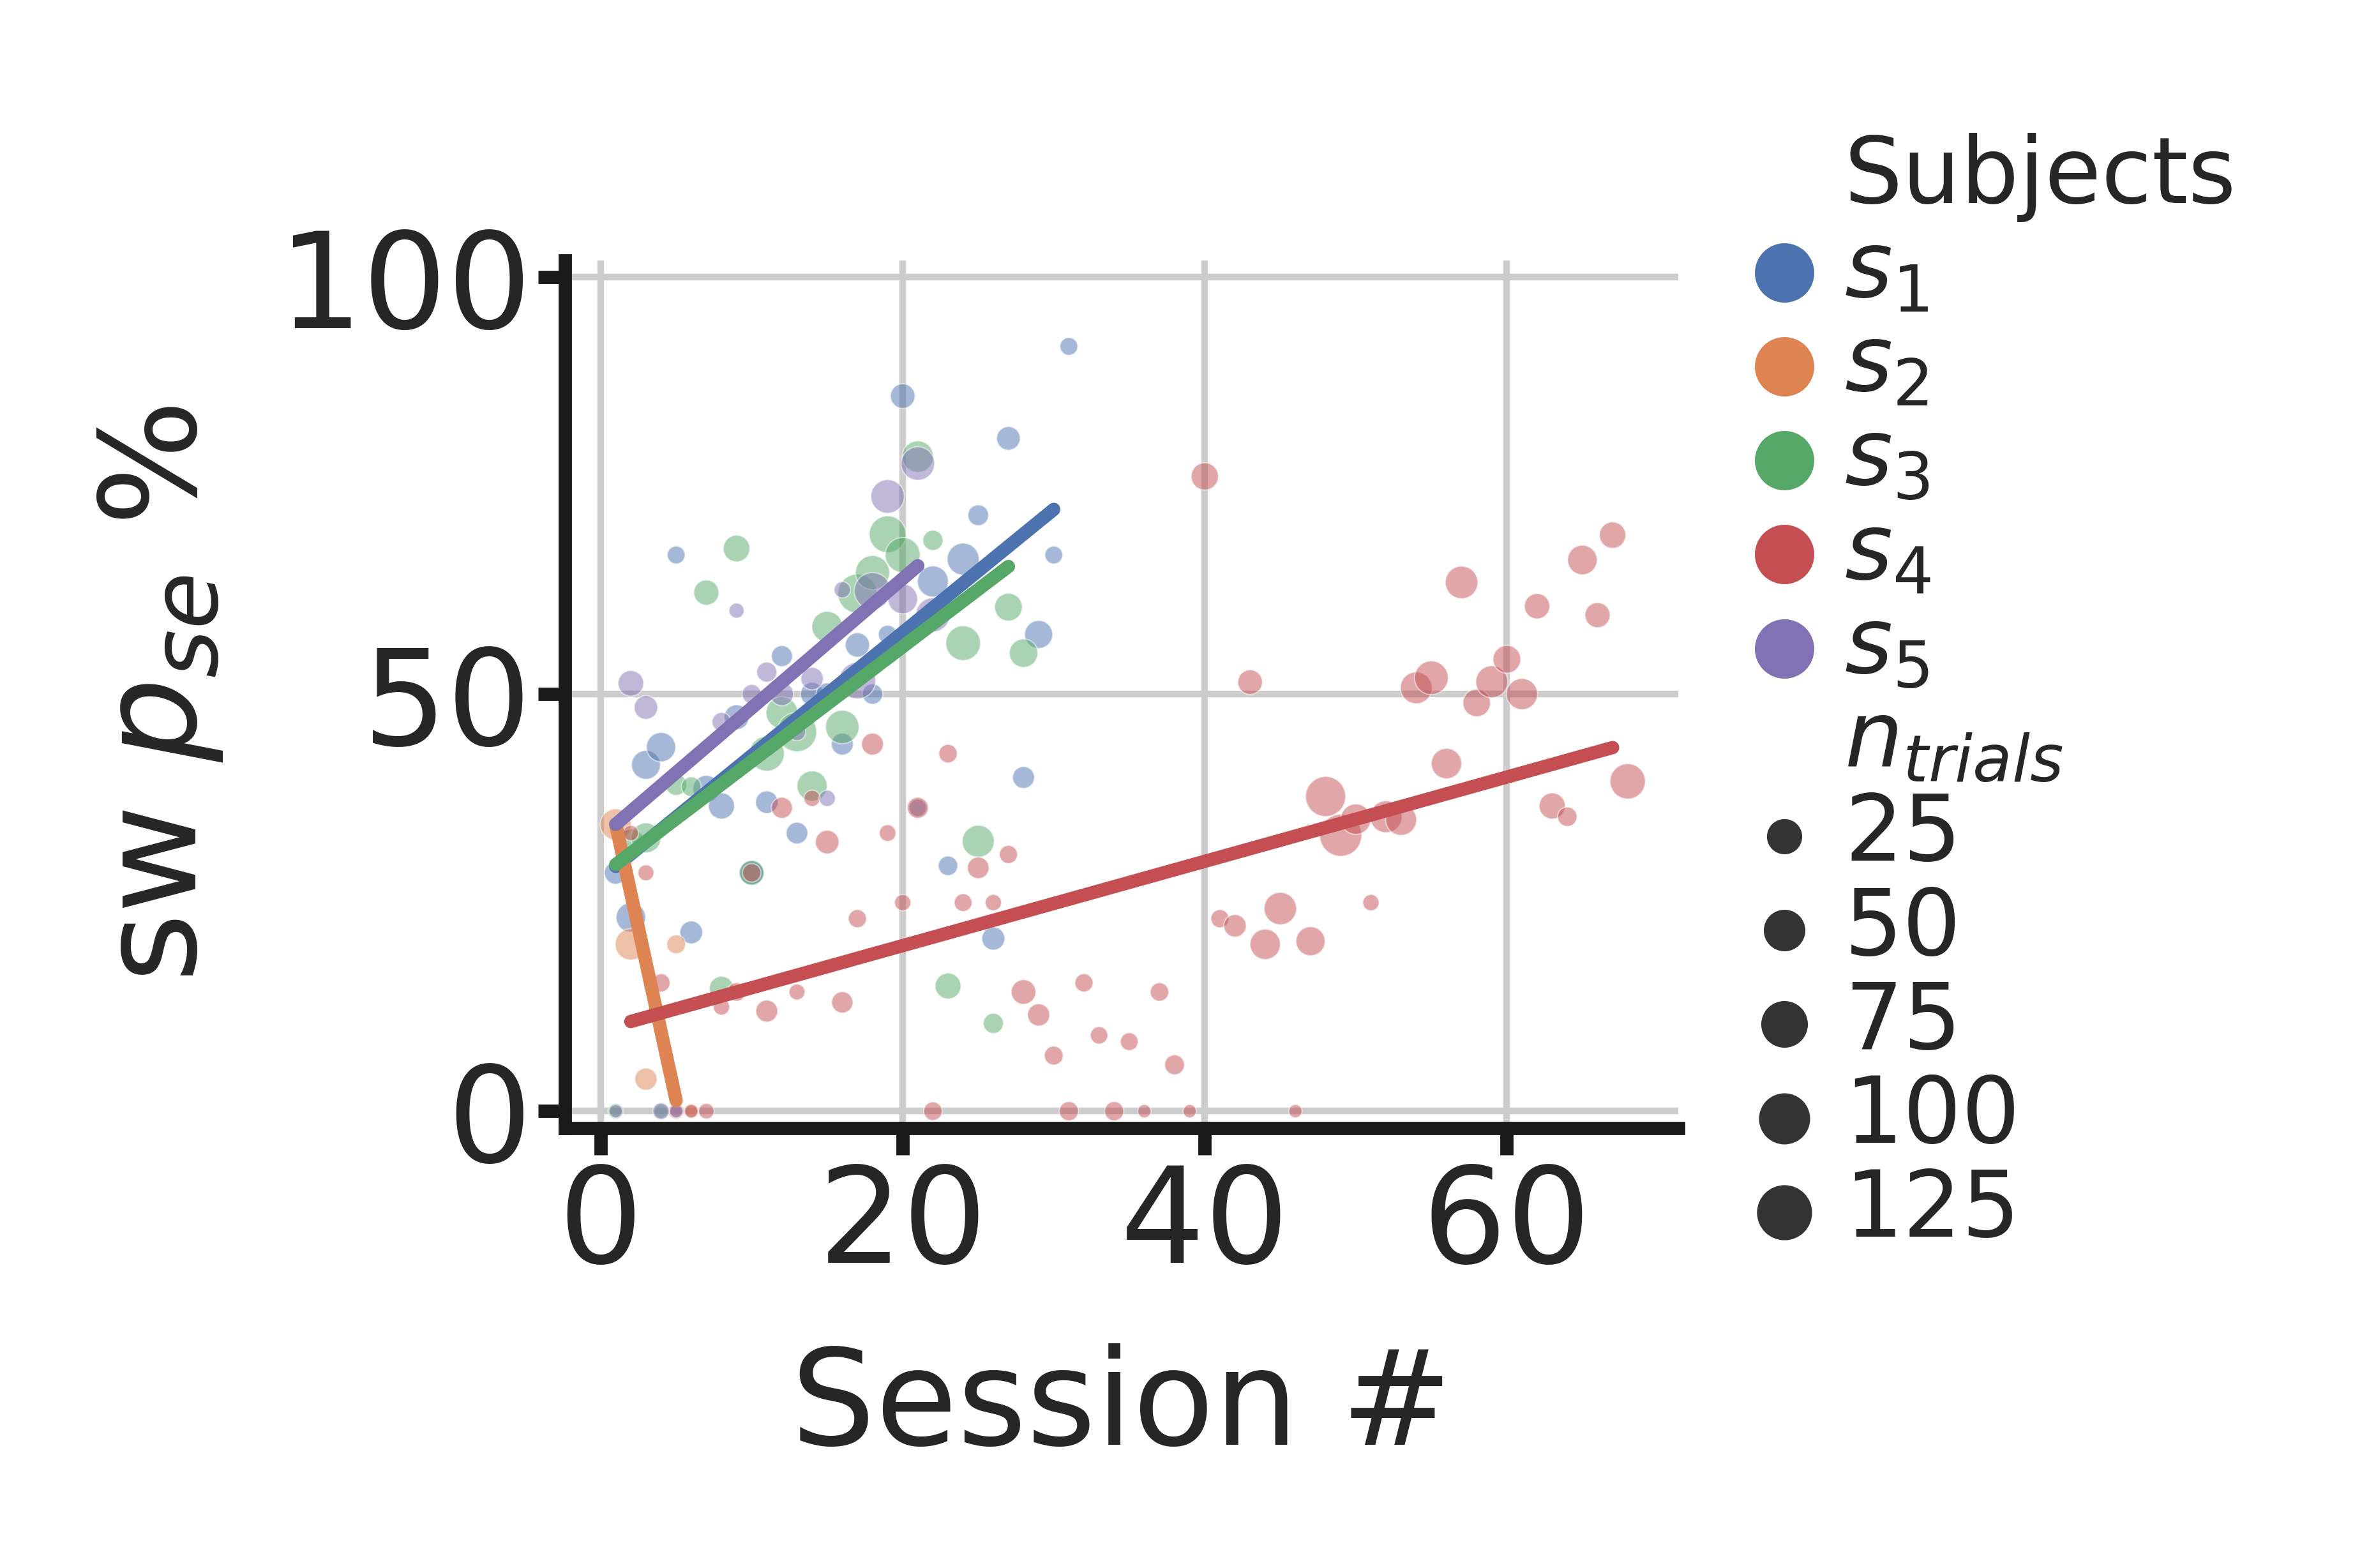

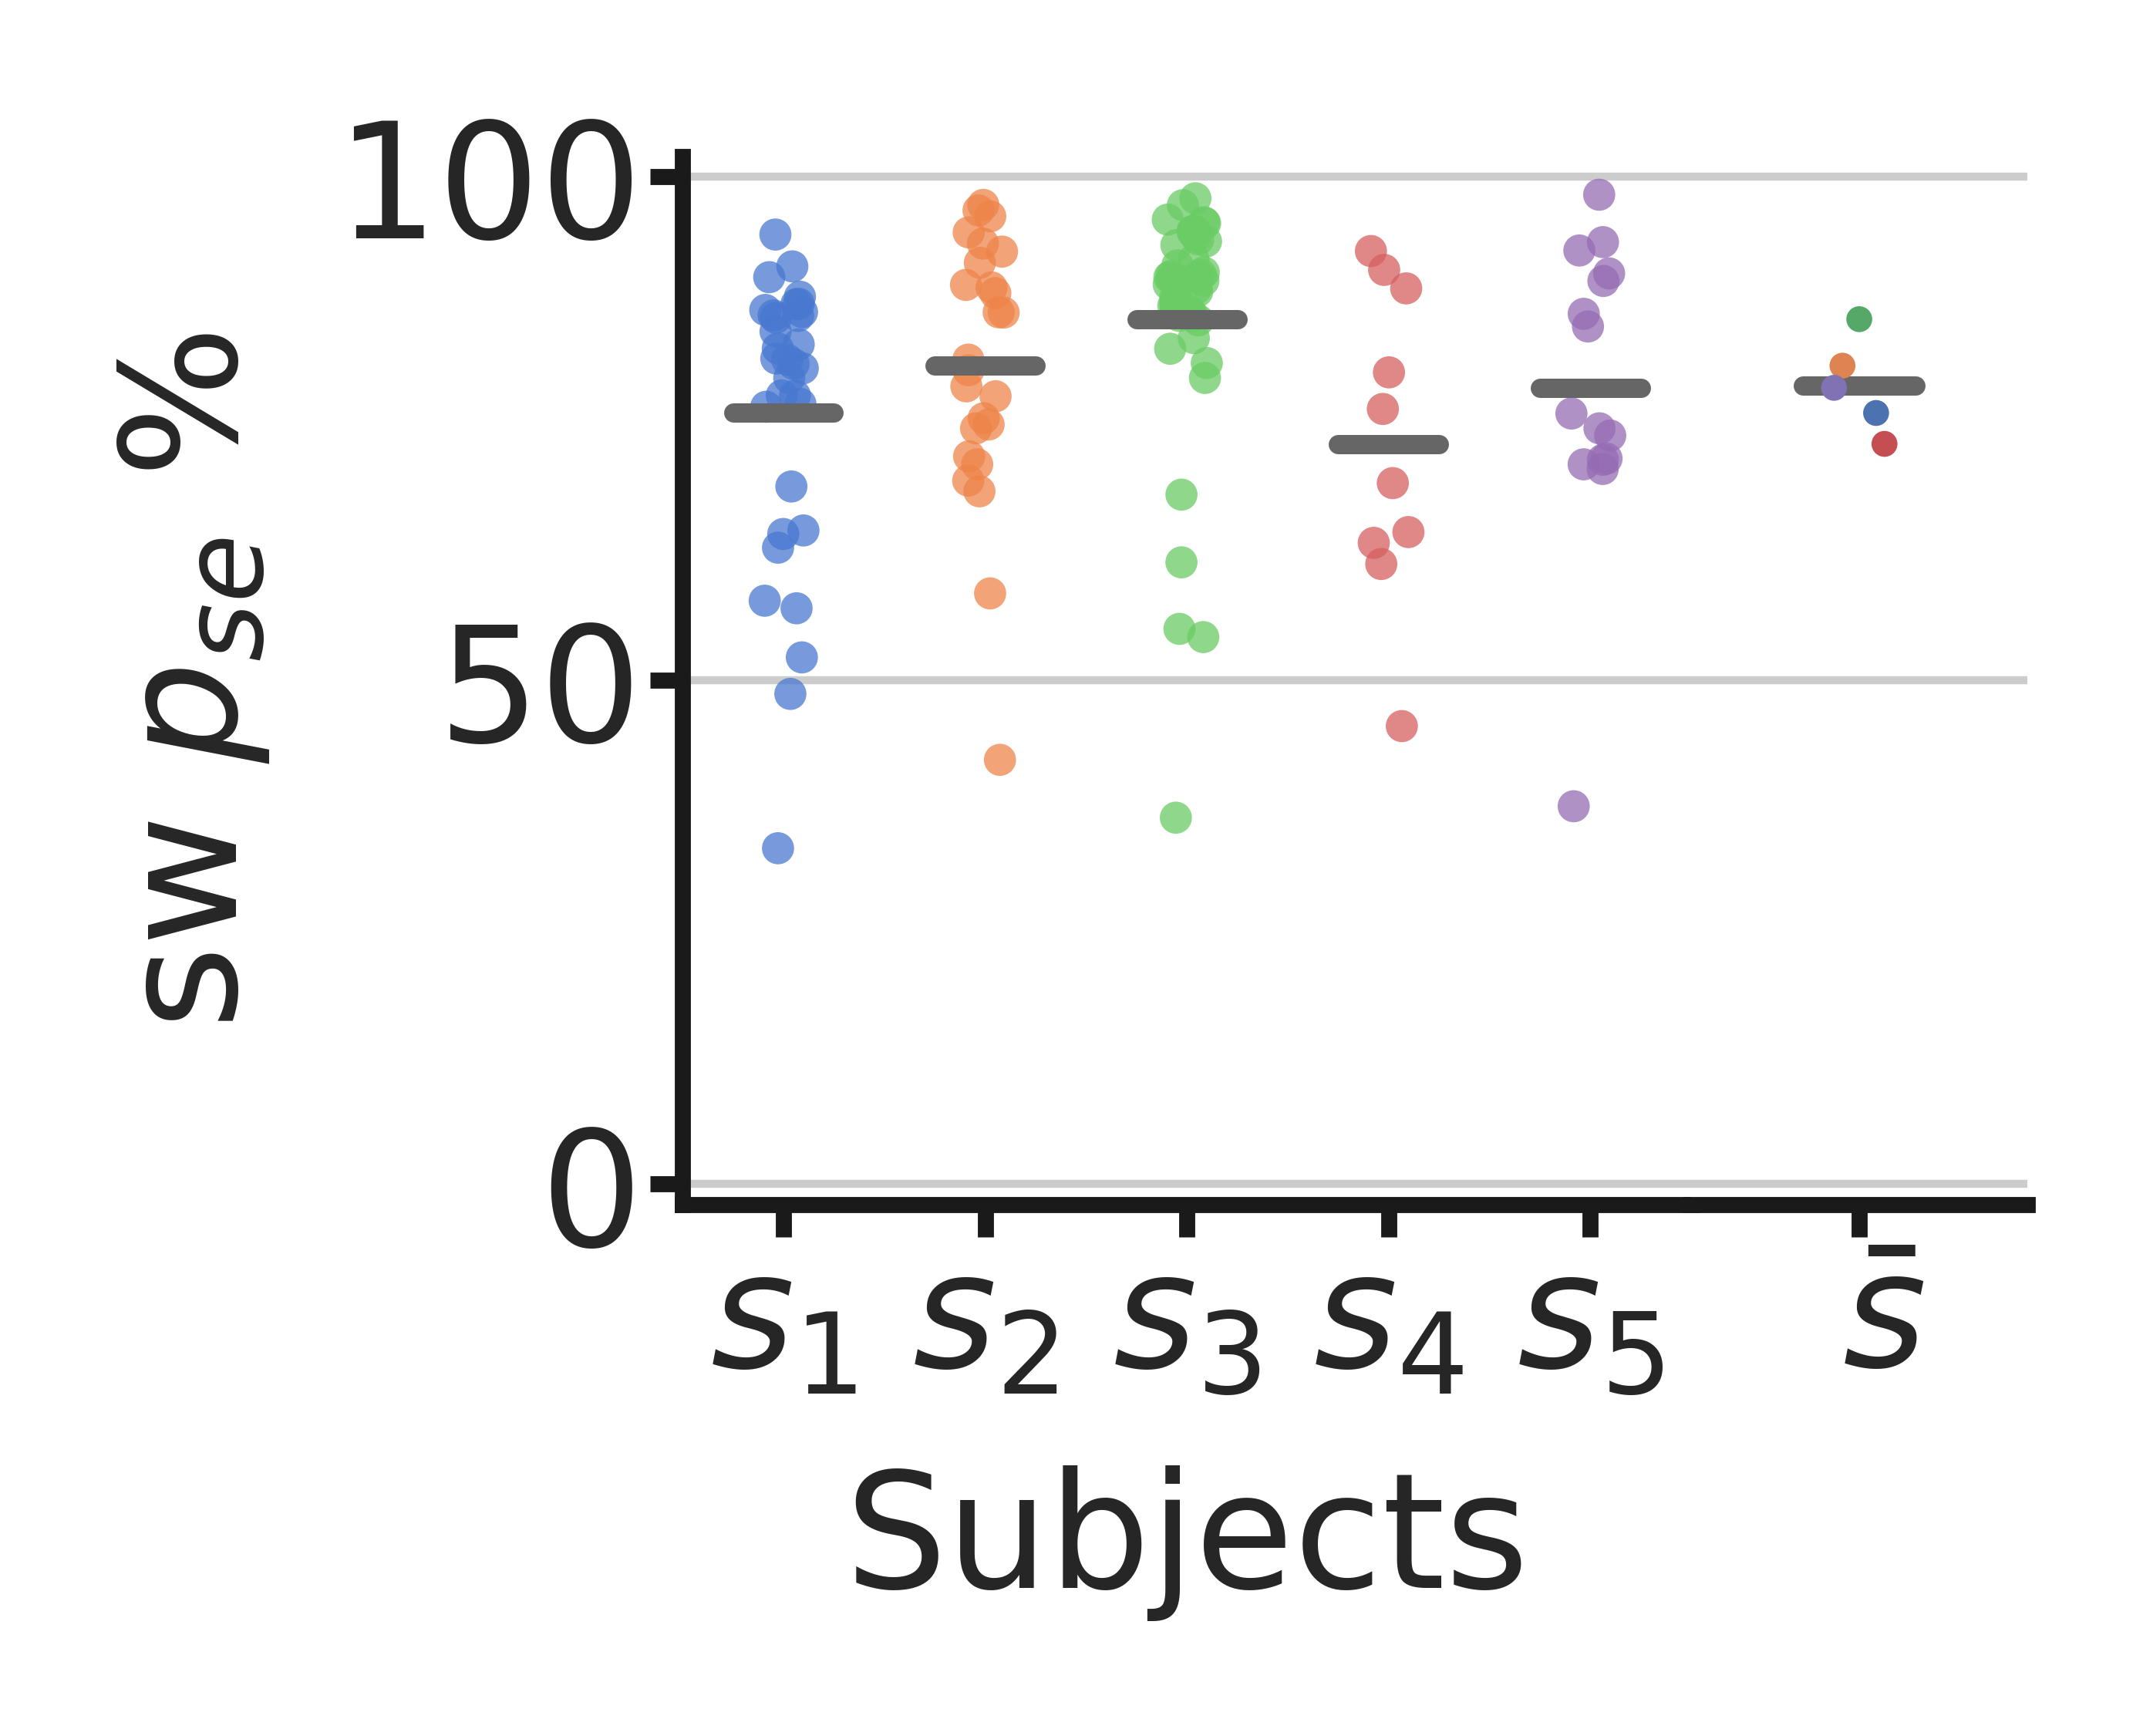

In [6]:
pf = reload(pf)
f = pf.SubjectBehavior(info)
yvars = ['p_co', 'p_co_sw']
for yvar in yvars:
    f.plot_lc(yvar=yvar, save_flag=True, save_format='svg')
    f.plot_perf_x_subj(yvar=yvar, save_flag=True, save_format='svg')

(<Figure size 2250x1800 with 2 Axes>,
 <AxesSubplot:xlabel='Subjects', ylabel='# units'>)

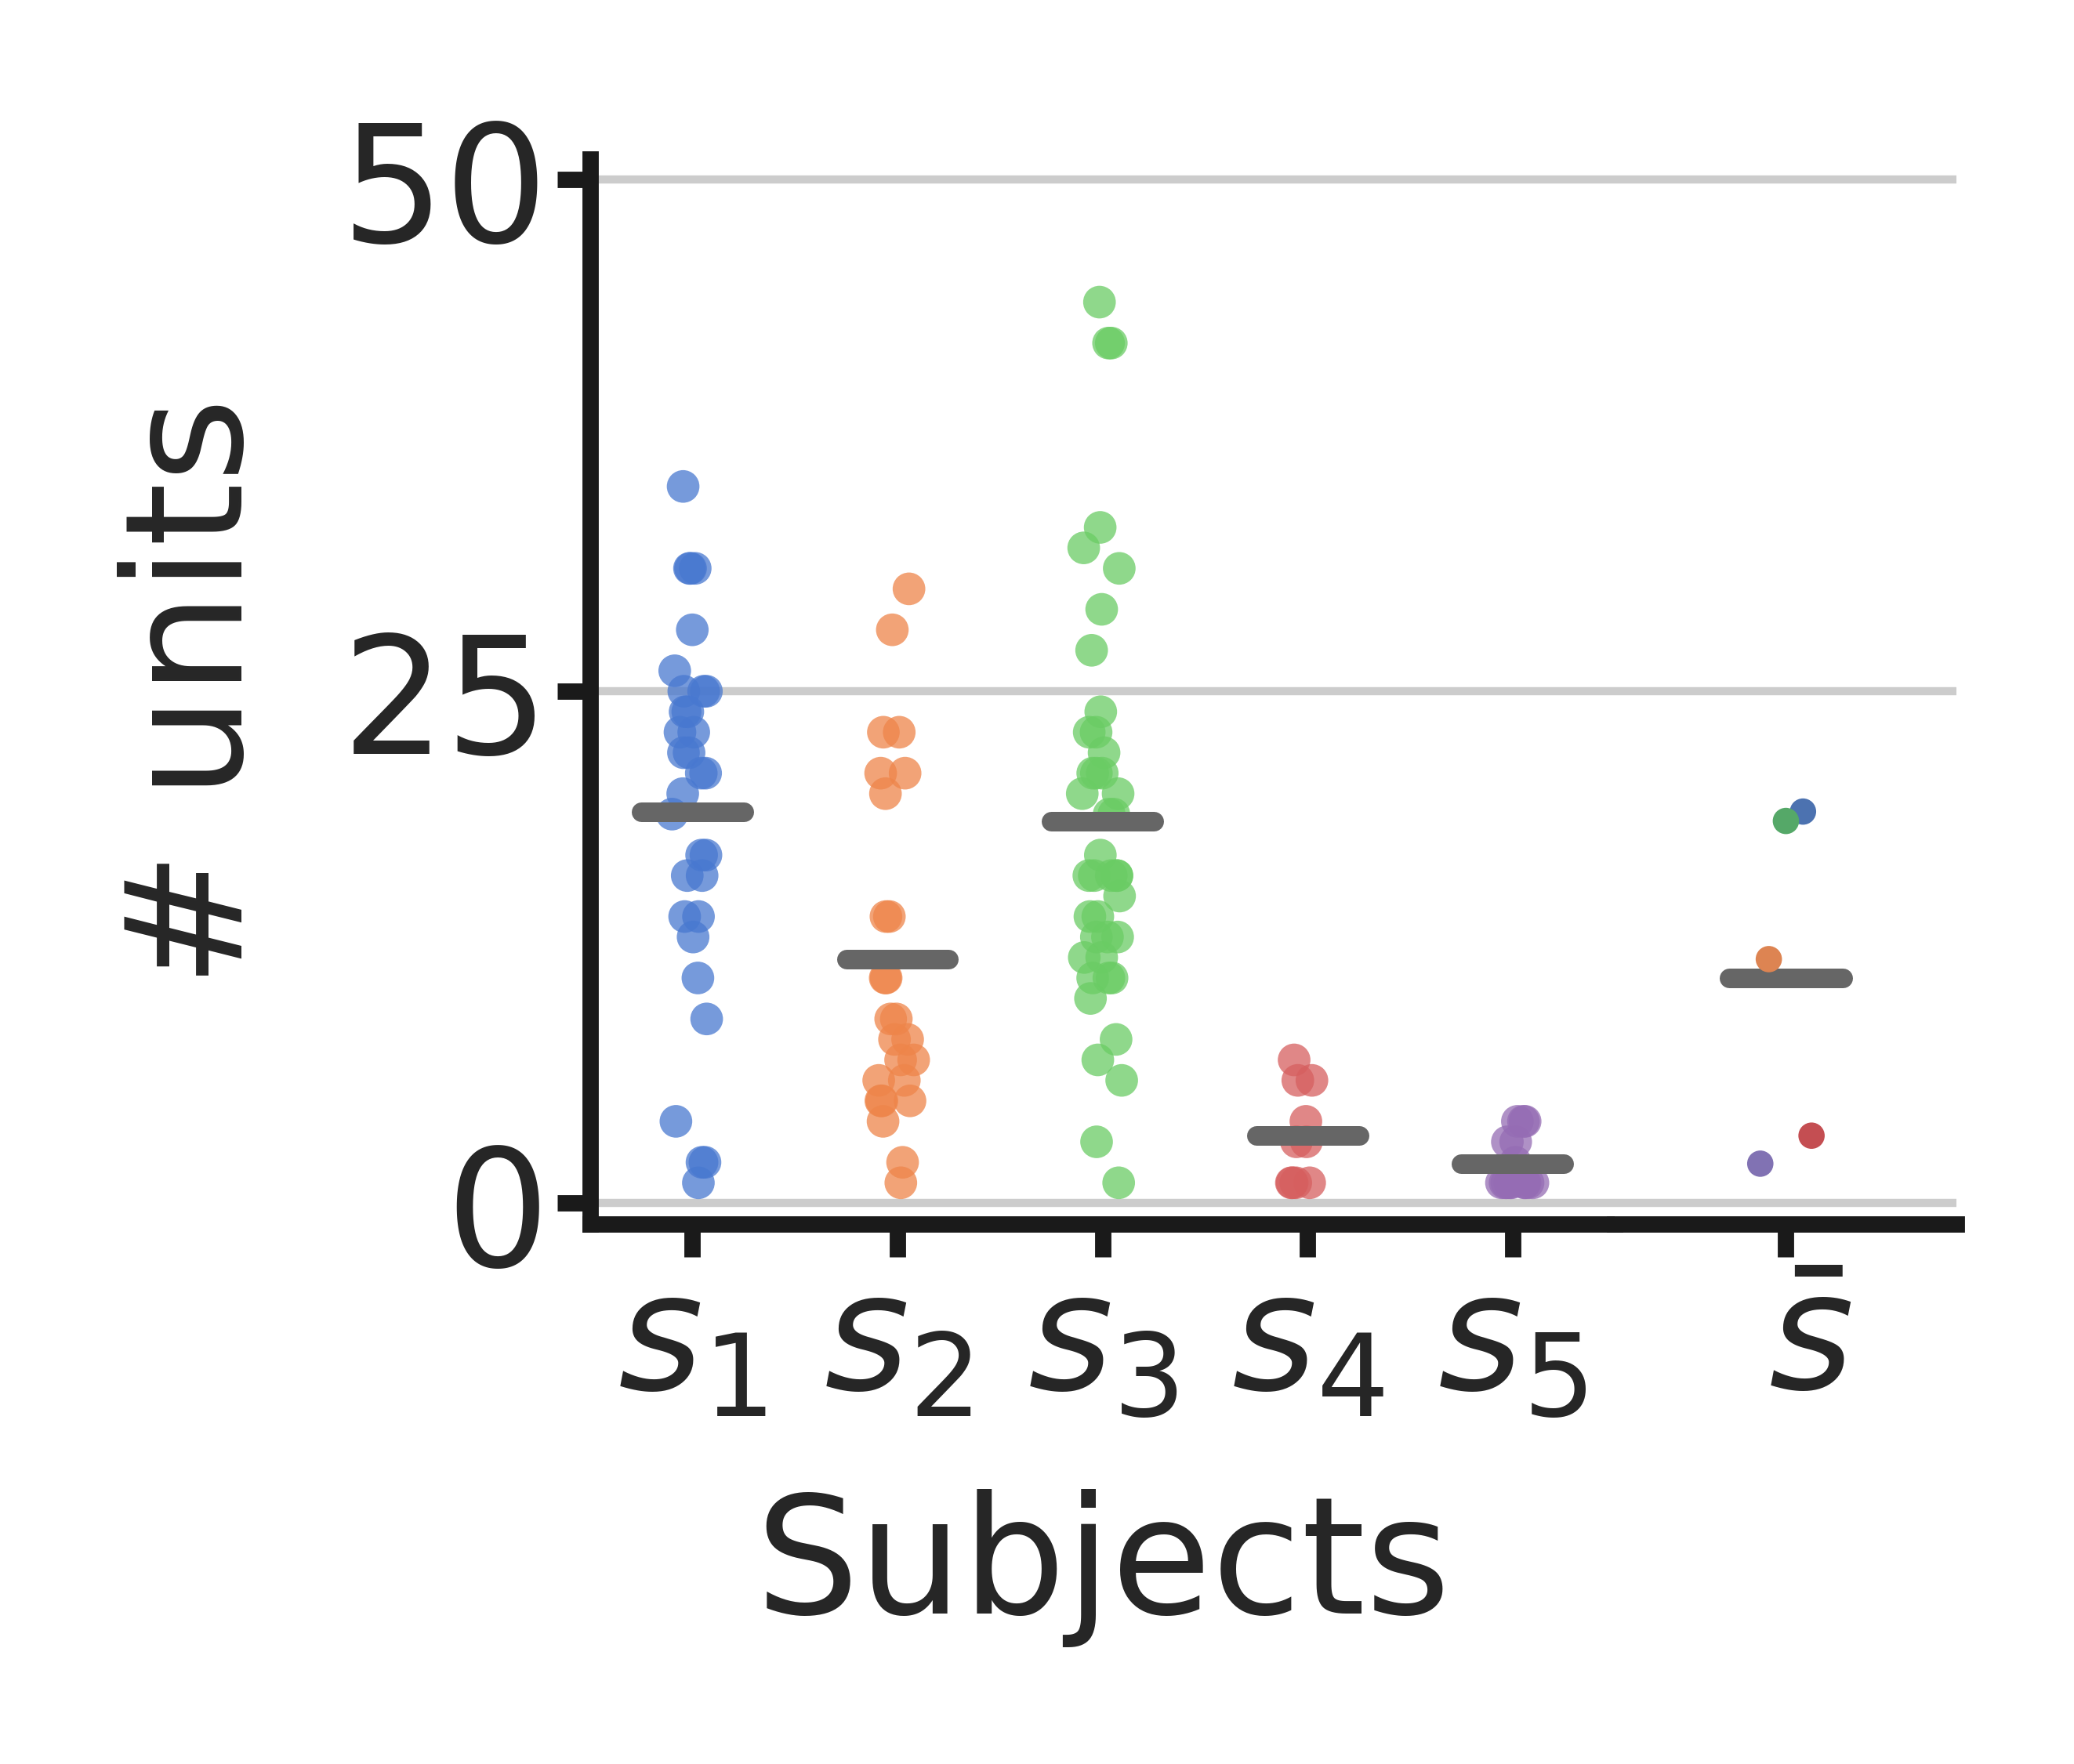

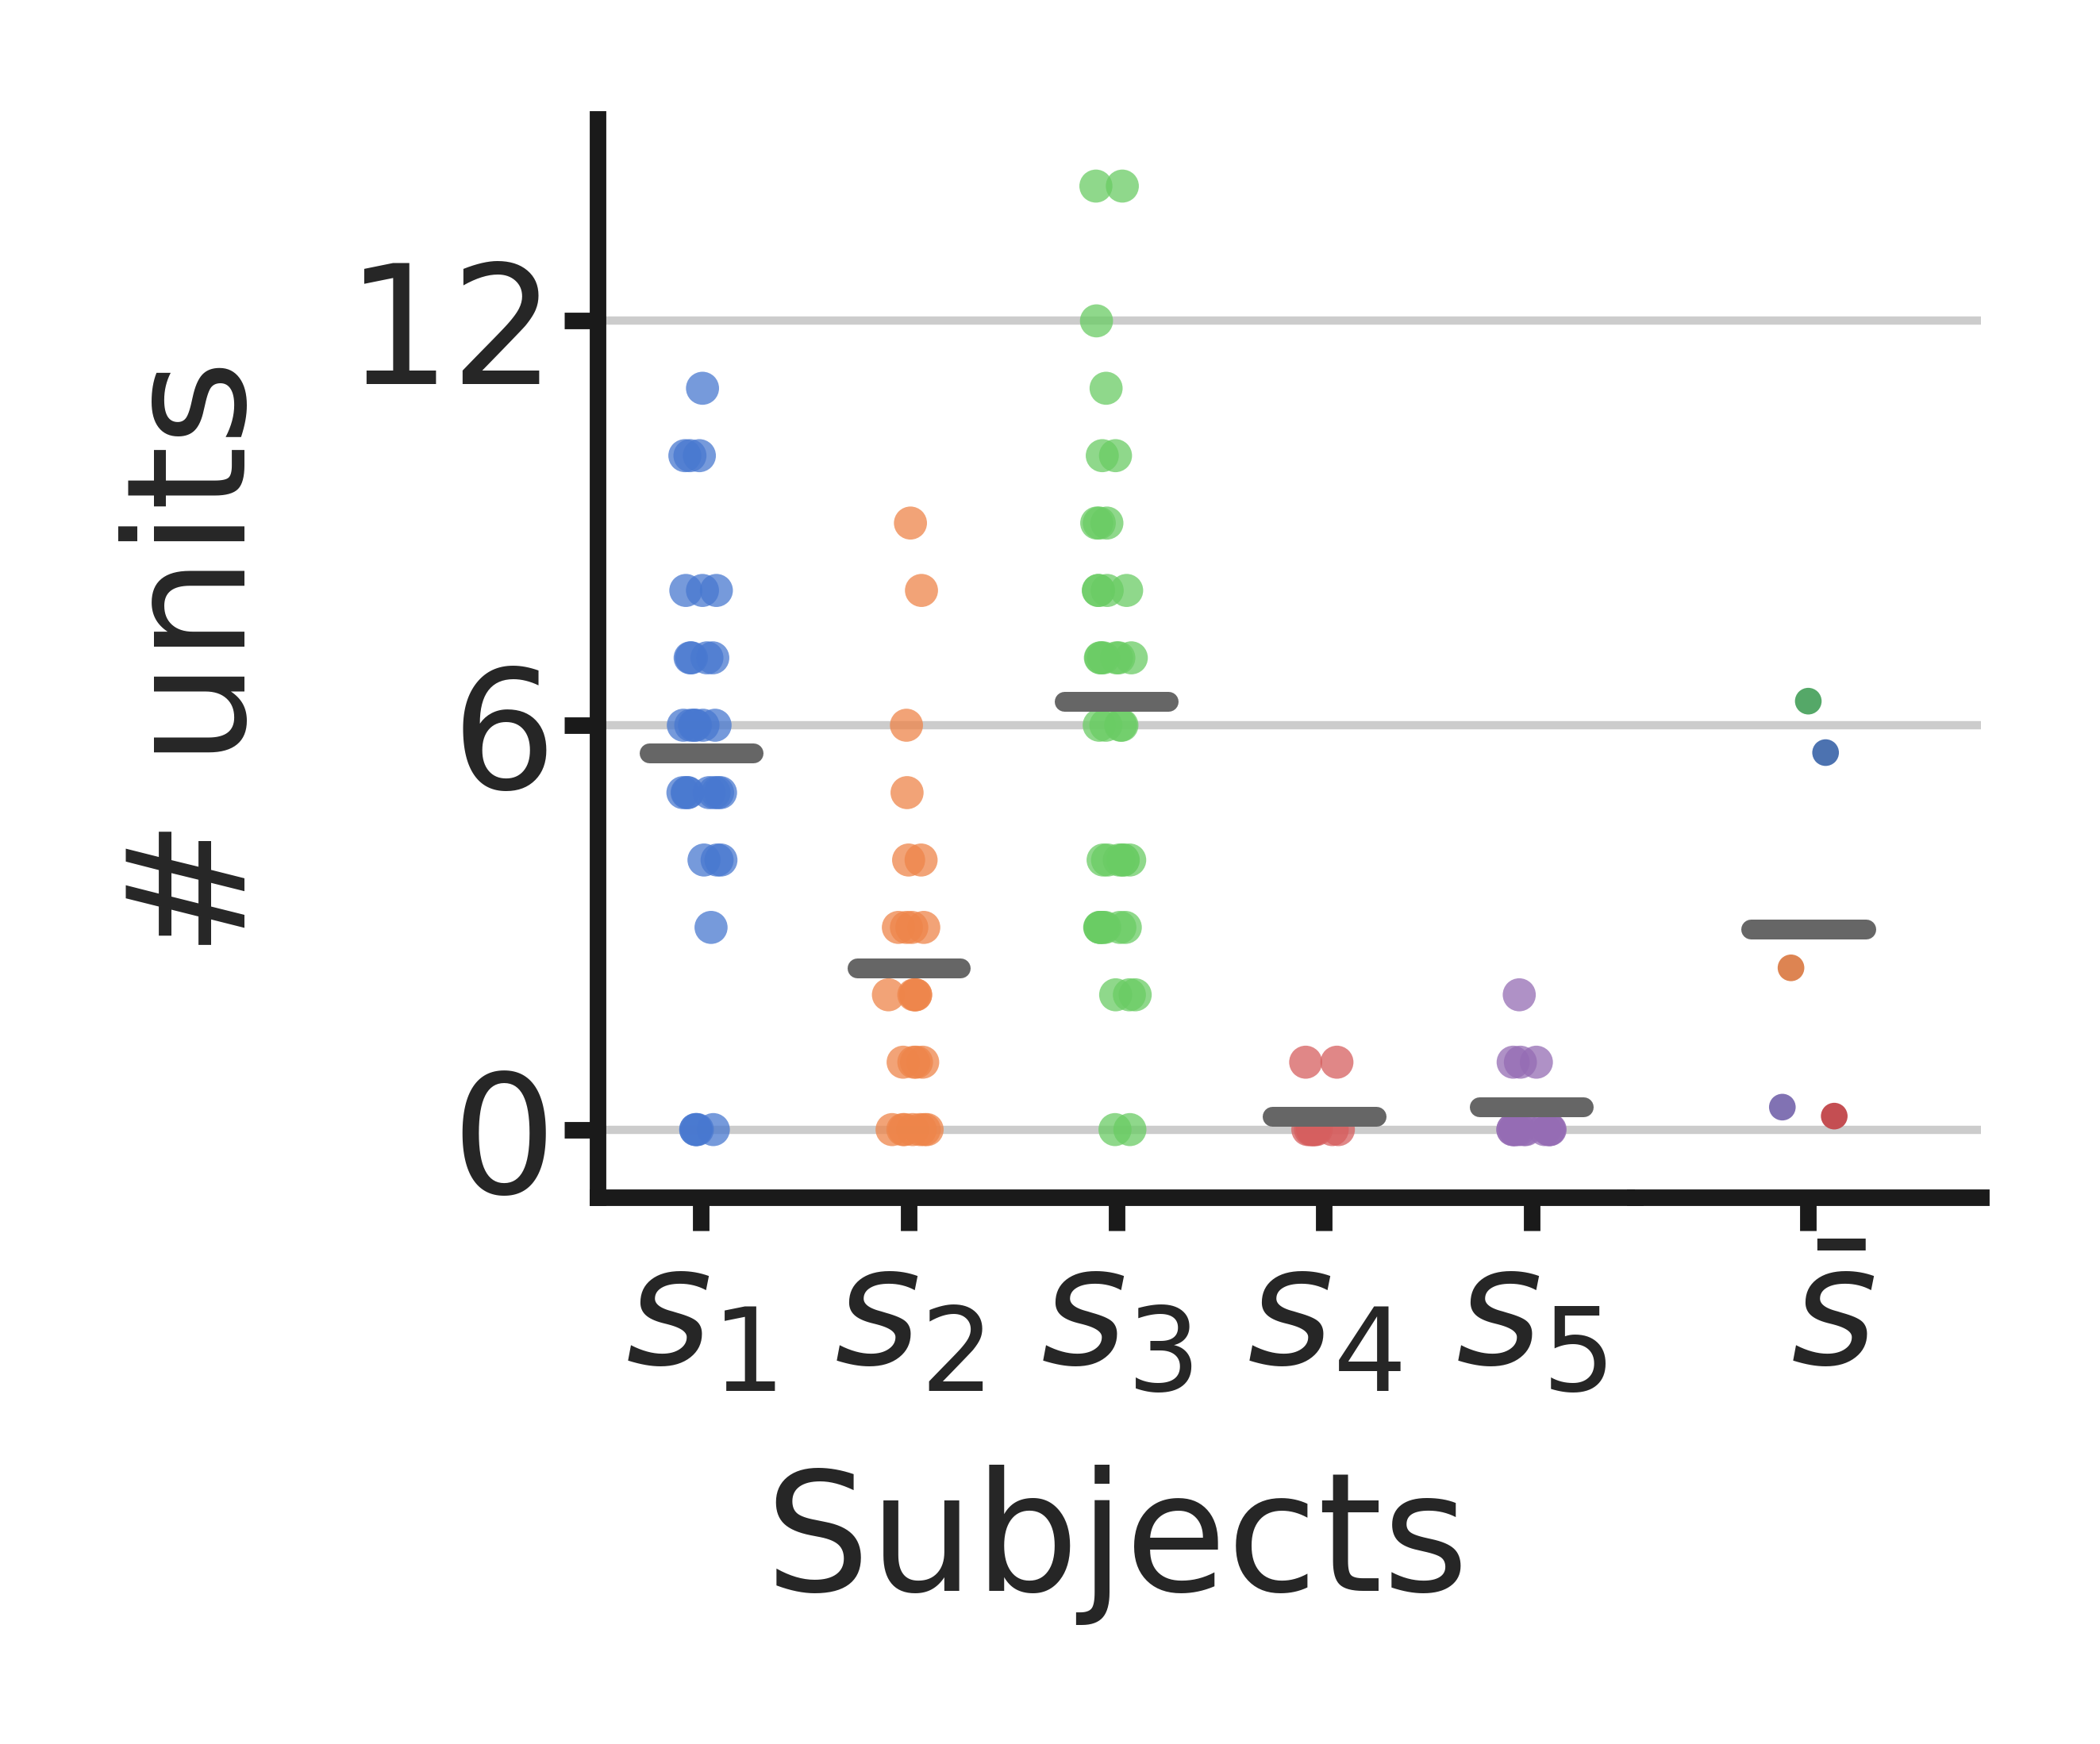

In [7]:
pf = reload(pf)
f = pf.SubjectBehavior(info)
f.plot_perf_x_subj(yvar='n_units', save_flag=True, save_format='png')
f.plot_perf_x_subj(yvar='n_cells', save_flag=True, save_format='png')

In [132]:
a = dict(a='a', b='b')
ap = dict(a='a1', p='p')

import copy

a2  = copy.deepcopy(a)
a2.update(ap)

print(a2)
print(a2|a)

{'a': 'a1', 'b': 'b', 'p': 'p'}
{'a': 'a', 'b': 'b', 'p': 'p'}


In [60]:
a = perf_recording.groupby('subject').mean()
a['color'] = [f.subject_colors[ii] for ii in a.index]
a

,n_trials,n_sw_trials,n_vsw_trials,n_L_trials,n_R_trials,pct_correct,pct_sw_correct,pct_vsw_correct,pct_L_correct,pct_R_correct,n_units,n_cells,n_mua,color
subject,,,,,,,,,,,,,,
Al,124.545455,59.954545,43.090909,62.636364,61.909091,0.624020,0.671329,0.668257,0.642643,0.635158,4.909091,1.045455,3.863636,"(0.7686274509803922, 0.3058823529411765, 0.321..."
Ca,125.608696,61.782609,47.913043,64.608696,61.000000,0.696291,0.710044,0.765627,0.781258,0.589461,4.217391,0.869565,3.347826,"(0.5058823529411764, 0.4470588235294118, 0.701..."
Cl,127.392157,62.215686,47.941176,64.509804,62.882353,0.758390,0.810593,0.847818,0.766625,0.733521,16.568627,5.490196,11.078431,"(0.3333333333333333, 0.6588235294117647, 0.407..."
Li,138.705882,65.823529,48.735294,71.411765,67.294118,0.699790,0.710177,0.766293,0.668725,0.737561,18.000000,5.264706,12.735294,"(0.2980392156862745, 0.4470588235294118, 0.690..."
Ne,139.289474,72.000000,53.868421,70.157895,69.131579,0.747269,0.779037,0.820411,0.709284,0.779963,9.052632,1.842105,7.210526,"(0.8666666666666667, 0.5176470588235295, 0.321..."


In [59]:
list(a.index)

['Al', 'Ca', 'Cl', 'Li', 'Ne']

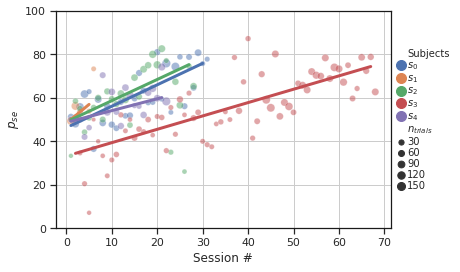

In [29]:
sub_table = perf[(perf.pre_surg_criteria==1)].copy()
sub_table.dropna(inplace=True)
sub_table['p_co'] *=100
sub_table['p_co_sw'] *=100


ax = sns.scatterplot(data=sub_table, x='session_num', y='p_co', hue='subject2', size='n_trials', palette='deep', alpha=0.5)

for ii, subject in enumerate(info.subjects):
    subject_table = sub_table[sub_table.subject==subject].copy() 
    subject_table.dropna(inplace=True)
    x = subject_table.session_num.values
    y = subject_table.p_co.values

    #slope, intercept, _, _, _ = stats.linregress(x, y)
    slope, intercept = stats.siegelslopes(y, x)
    xx = np.arange(x.min(), x.max())
    yy = intercept + slope*xx

    ax.plot(xx,yy, color=sns.palettes.color_palette('deep')[ii], lw=3)
    
ax.set_xlabel("Session #")
ax.set_ylabel(f"$p_{{se}}$")
ax.set_ylim([0,100])

l = ax.get_legend_handles_labels()
l[1][0]='Subjects'
n_subjects = len(info.subjects)
l[1][n_subjects+1] =  f'$n_{{trials}}$'

for ii, ll in enumerate(l[0]):
    if ii > n_subjects:
        break
    ll.set_sizes([100])

ax.legend(handles=l[0], labels=l[1], loc='center', bbox_to_anchor=[1,0,0.2,1], frameon=False,
                     fontsize=10, labelspacing=0.1, handlelength=0.5, handletextpad=0.4)

(<Figure size 2250x1800 with 1 Axes>,
 <AxesSubplot:xlabel='Session #', ylabel='$p_{se}$ %'>)

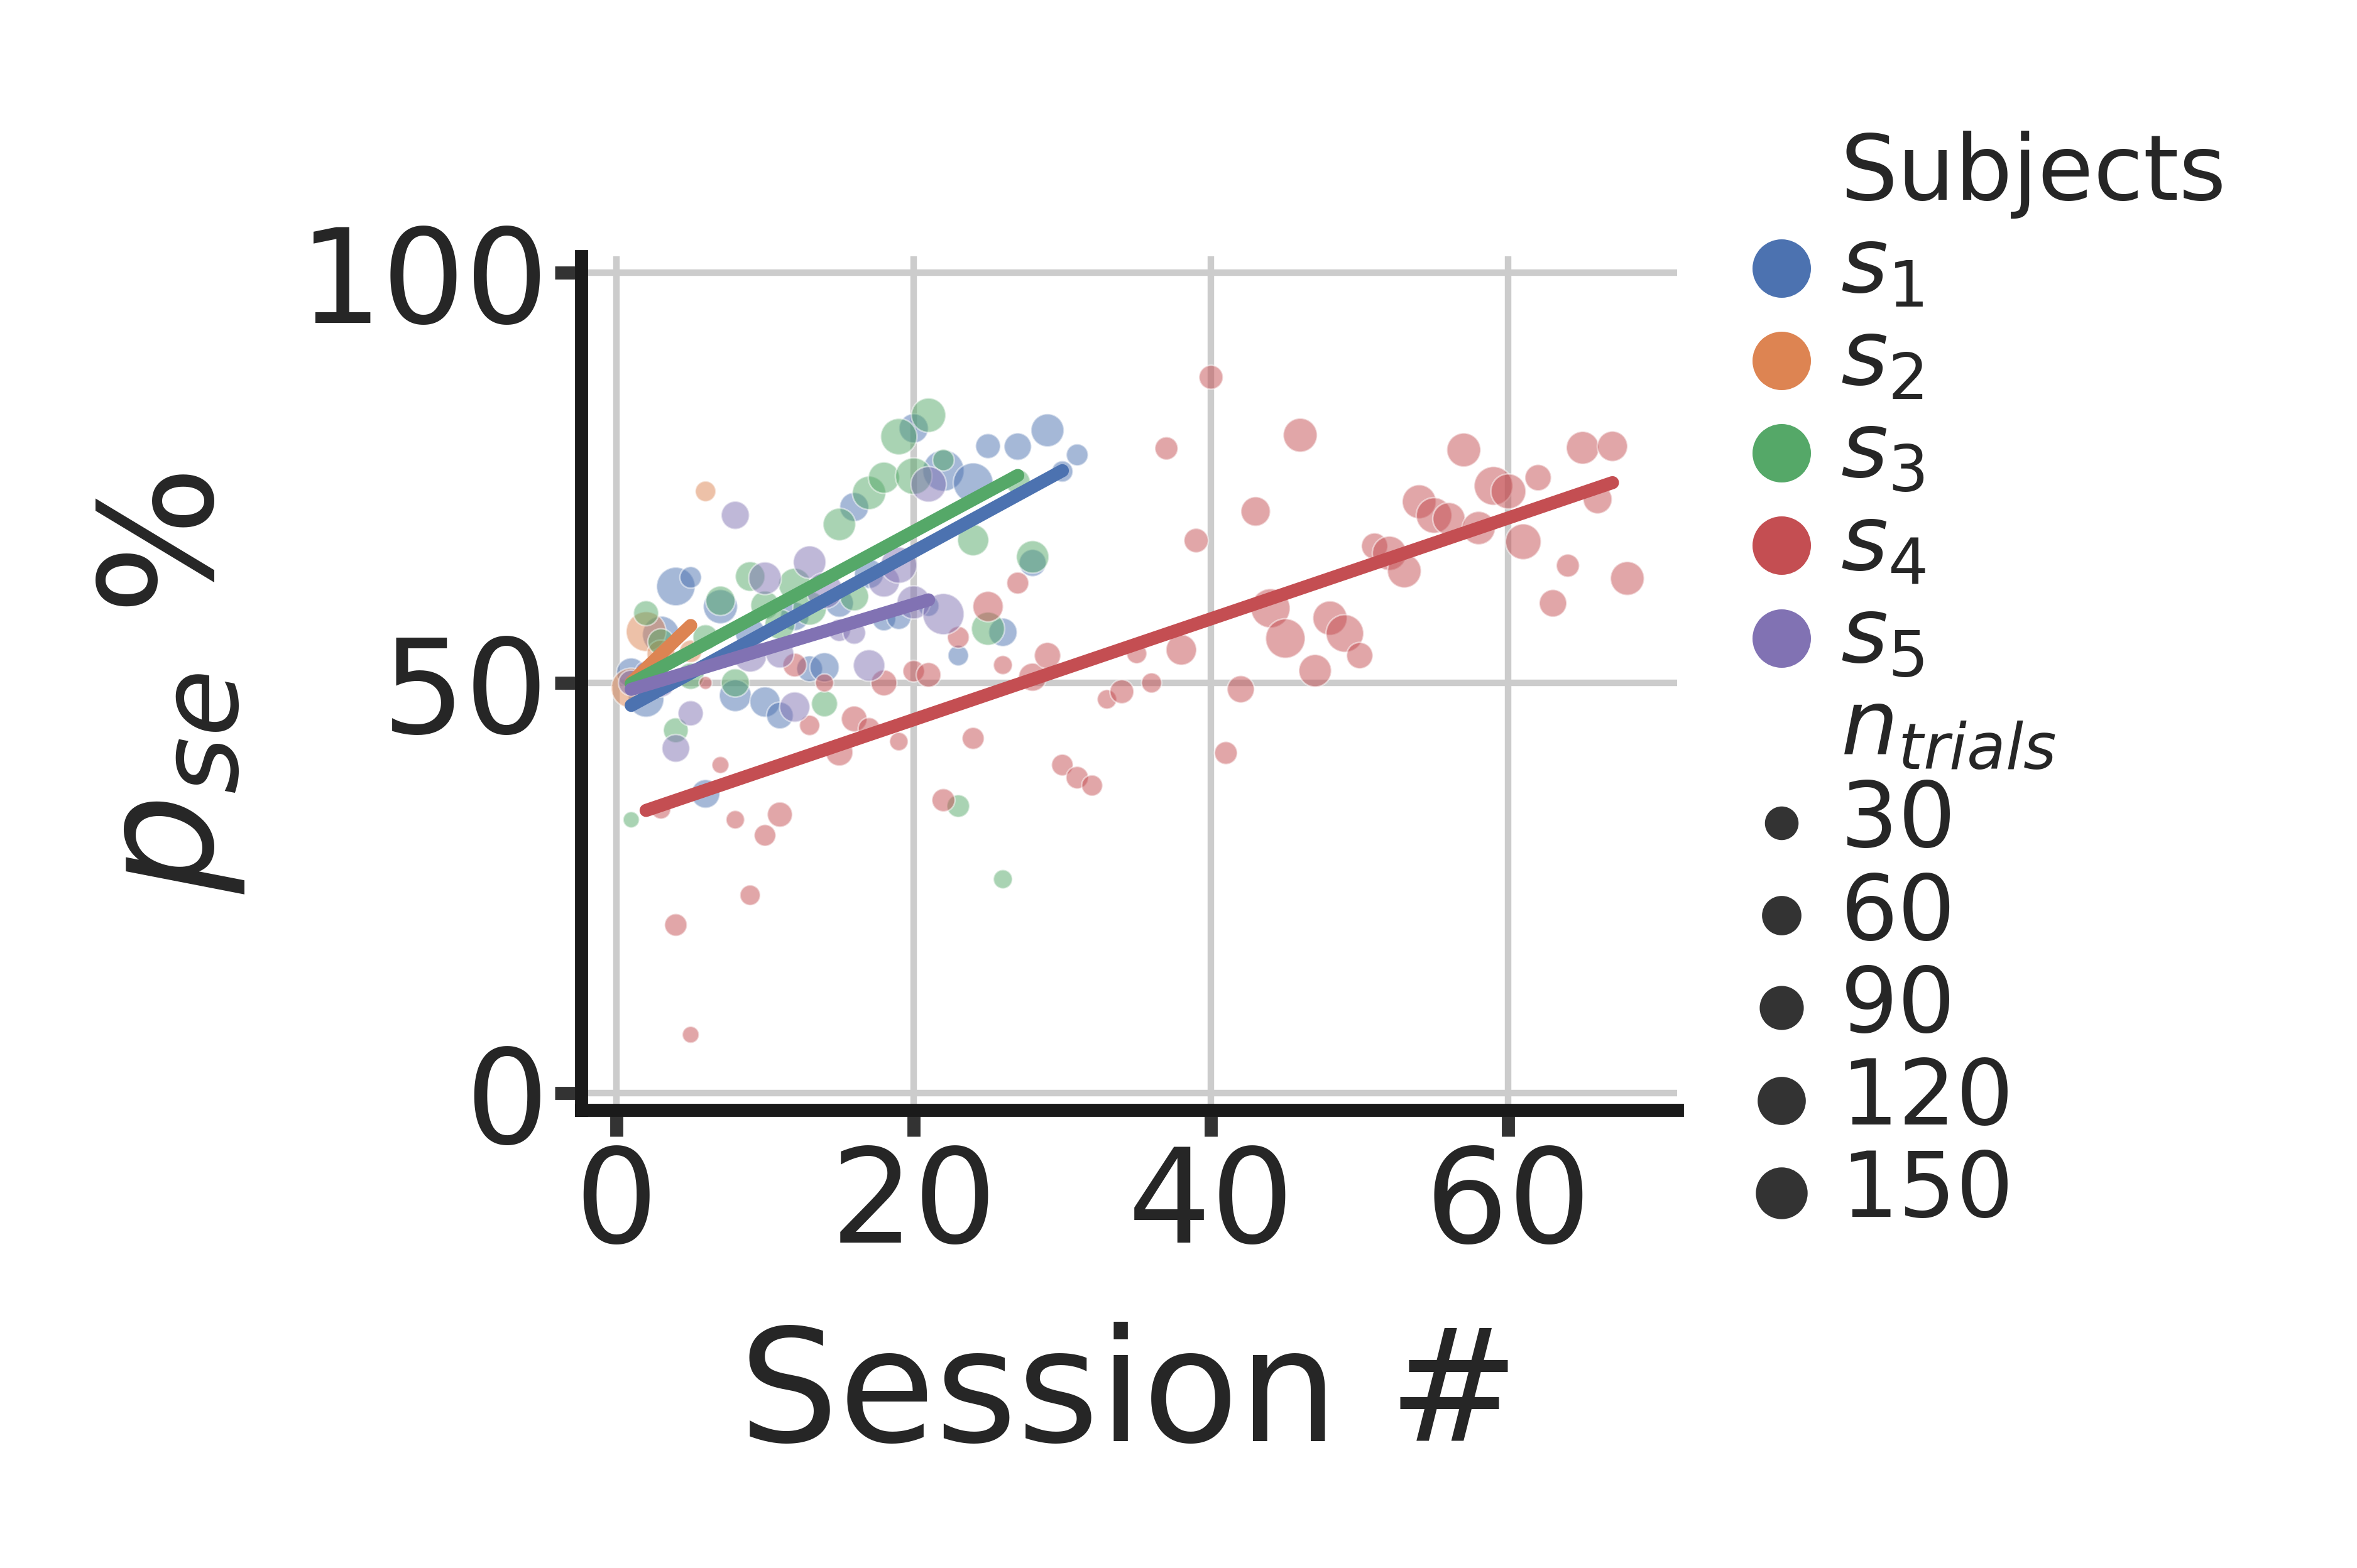

In [117]:
ei = reload(ei)
pf = reload(pf)

info = ei.SummaryInfo()
f = pf.SubjectBehavior(info)

f.plot_lc(yvar='p_co')

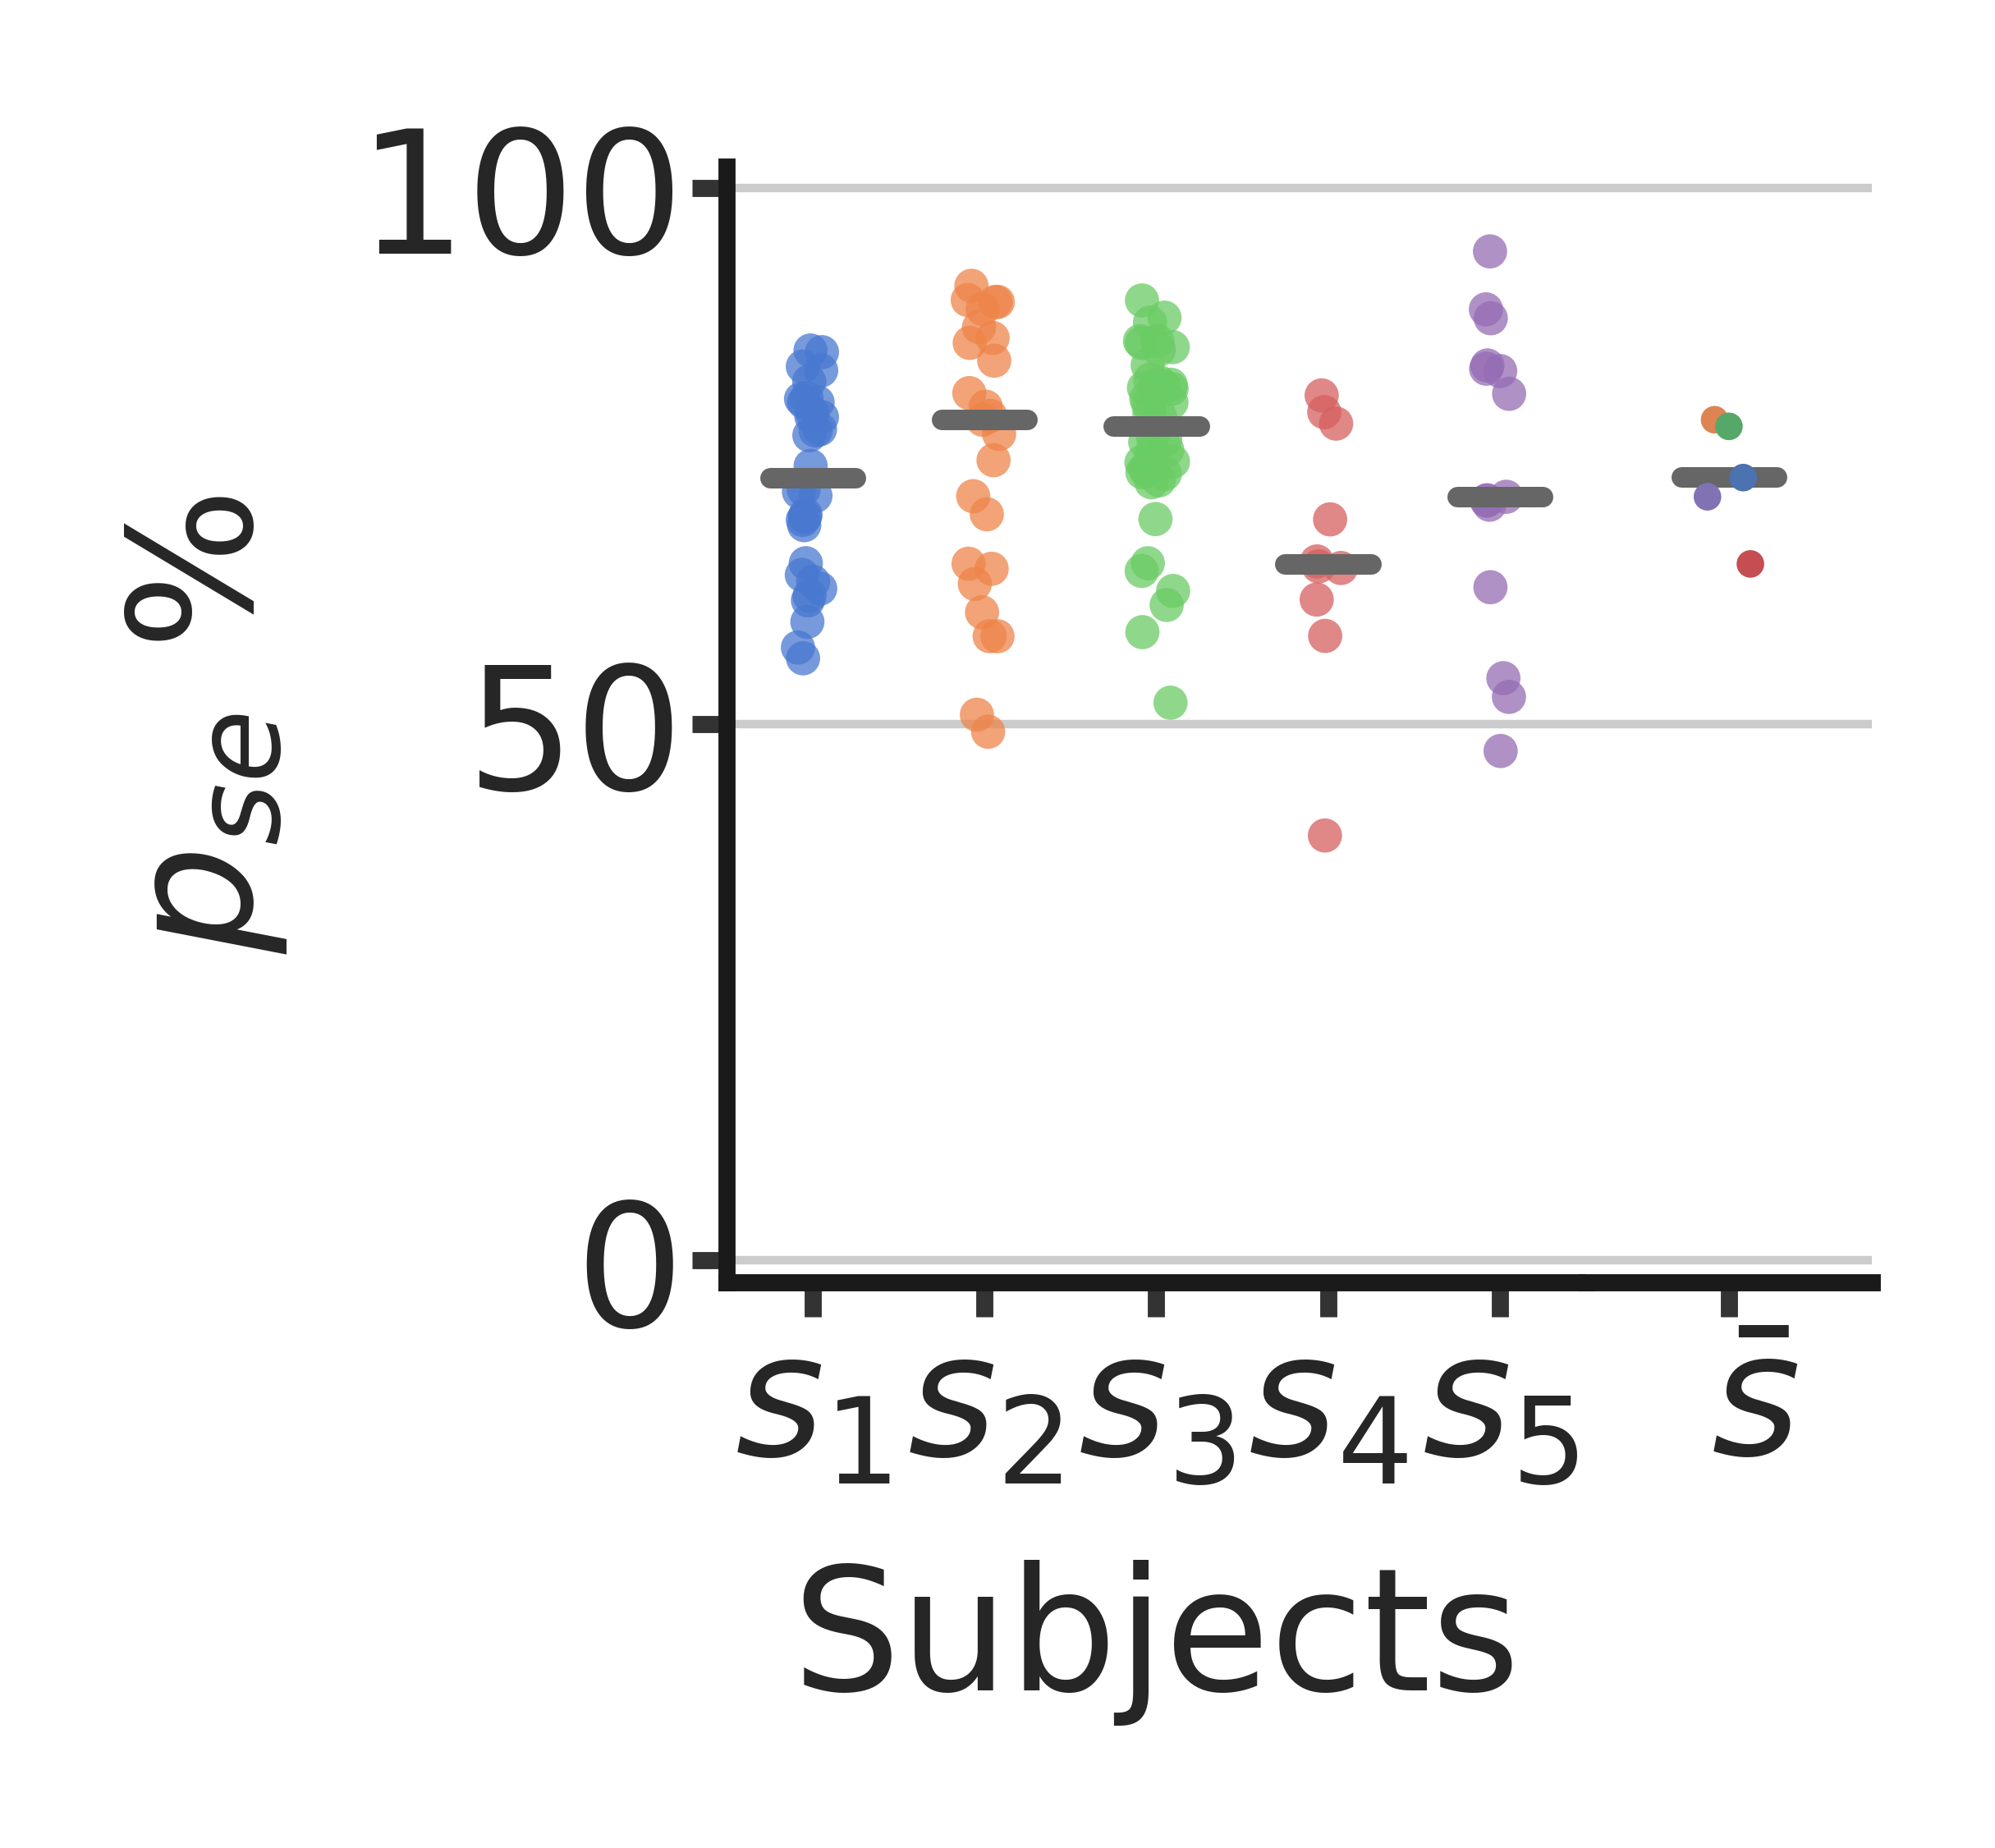

In [112]:
pf = reload(pf)
f = pf.SubjectBehavior(info)
f.plot_perf_x_subj(yvar='p_co')

In [111]:
np.sqrt(50)

7.0710678118654755

In [67]:
a= {'a':'b'}
b= {'c':'d'}
{**a, **b}, a|b

({'a': 'b', 'c': 'd'}, {'a': 'b', 'c': 'd'})

In [176]:
m = smf.mixedlm('p_co ~ session_num', groups='subject', re_formula="1", data=sub_table).fit()
m.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: p_co     
No. Observations: 151     Method:             REML     
No. Groups:       5       Scale:              102.9559 
Min. group size:  5       Log-Likelihood:     -569.9992
Max. group size:  67      Converged:          Yes      
Mean group size:  30.2                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    47.377    4.172 11.357 0.000 39.200 55.553
session_num   0.631    0.059 10.714 0.000  0.516  0.746
subject Var  75.989    5.773                           
=======================================================

"""

In [177]:
(70-47.4)/0.63

35.87301587301587

In [178]:
(70-39)/0.52, (70-55)/0.75 

(59.61538461538461, 20.0)

In [144]:
stats.siegelslopes(y,x)

(0.005448717948717948, 0.4867256769710041)

In [127]:
sub_table

,subject,subject2,expt,date,session_num,n_trials,n_sw_trials,n_co_trials,n_co_sw_trials,p_co,p_co_sw,pre_surg_criteria
0,Li,$s_0$,T3g,2018-02-20,1.0,80.0,28.0,41.0,8.0,0.512500,0.285714,1
1,Li,$s_0$,T3g,2018-02-21,2.0,125.0,56.0,60.0,13.0,0.480000,0.232143,1
2,Li,$s_0$,T3g,2018-02-22,3.0,136.0,53.0,76.0,22.0,0.558824,0.415094,1
3,Li,$s_0$,T3g,2018-02-23,4.0,149.0,55.0,92.0,24.0,0.617450,0.436364,1
4,Li,$s_0$,T3g,2018-02-24,5.0,35.0,12.0,22.0,8.0,0.628571,0.666667,1
5,Li,$s_0$,T3g,2018-02-26,6.0,74.0,28.0,27.0,6.0,0.364865,0.214286,1
6,Li,$s_0$,T3g,2018-02-27,7.0,113.0,44.0,67.0,17.0,0.592920,0.386364,1
7,Li,$s_0$,T3g,2018-02-28,8.0,97.0,41.0,47.0,15.0,0.484536,0.365854,1
8,Li,$s_0$,T3g,2018-03-01,9.0,82.0,36.0,46.0,17.0,0.560976,0.472222,1
9,Li,$s_0$,T3g,2018-03-02,10.0,86.0,35.0,41.0,10.0,0.476744,0.285714,1


In [114]:
l = ax.get_legend_handles_labels()
l[1][0]=''
n_subjects = len(info.subjects)
l[1][n_subjects+1] =  f'$n_{{trials}}$'
ax.legend(bb)

([<matplotlib.collections.PathCollection at 0x7f1259bafb80>,
 ['',
  '$s_0$',
  '$s_1$',
  '$s_2$',
  '$s_3$',
  '$s_4$',
  '$n_{trials}$',
  '30',
  '60',
  '90',
  '120',
  '150'])

In [115]:
ax.legend?

Signature: ax.legend(*args, **kwargs)
Docstring:
Place a legend on the Axes.

Call signatures::

    legend()
    legend(labels)
    legend(handles, labels)

The call signatures correspond to these three different ways to use
this method:

**1. Automatic detection of elements to be shown in the legend**

The elements to be added to the legend are automatically determined,
when you do not pass in any extra arguments.

In this case, the labels are taken from the artist. You can specify
them either at artist creation or by calling the
:meth:`~.Artist.set_label` method on the artist::

    ax.plot([1, 2, 3], label='Inline label')
    ax.legend()

or::

    line, = ax.plot([1, 2, 3])
    line.set_label('Label via method')
    ax.legend()

Specific lines can be excluded from the automatic legend element
selection by defining a label starting with an underscore.
This is default for all artists, so calling `.Axes.legend` without
any arguments and without setting the labels manually will result

In [85]:
a = stats.siegelslopes(x, y)
a

(51.73672541948774, -17.534521739428058)

In [76]:
subject = 'Al'
subject_table = sub_table[sub_table.subject==subject].copy() 
subject_table.dropna(inplace=True)
x = subject_table.session_num
y = subject_table.p_co

slope, intercept, r, p, se = stats.linregress(x, y)

xx = np.arange(x.min(), x.max())
yy = intercept + slope*xx



In [77]:
yy

array([0.33902206, 0.34526486, 0.35150765, 0.35775044, 0.36399324,
       0.37023603, 0.37647883, 0.38272162, 0.38896442, 0.39520721,
       0.40145001, 0.4076928 , 0.41393559, 0.42017839, 0.42642118,
       0.43266398, 0.43890677, 0.44514957, 0.45139236, 0.45763516,
       0.46387795, 0.47012074, 0.47636354, 0.48260633, 0.48884913,
       0.49509192, 0.50133472, 0.50757751, 0.51382031, 0.5200631 ,
       0.52630589, 0.53254869, 0.53879148, 0.54503428, 0.55127707,
       0.55751987, 0.56376266, 0.57000545, 0.57624825, 0.58249104,
       0.58873384, 0.59497663, 0.60121943, 0.60746222, 0.61370502,
       0.61994781, 0.6261906 , 0.6324334 , 0.63867619, 0.64491899,
       0.65116178, 0.65740458, 0.66364737, 0.66989017, 0.67613296,
       0.68237575, 0.68861855, 0.69486134, 0.70110414, 0.70734693,
       0.71358973, 0.71983252, 0.72607532, 0.73231811, 0.7385609 ,
       0.7448037 ])

(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)

In [61]:
x = sub_table[sub_table.subject==subject].session_num
y = sub_table[sub_table.subject==subject].p_co

slope, intercept, r, p, se = stats.linregress(x, y)

xx = np.arange(x.min(), x.max())
yy = intercept + slope*xx

ax.plot(xx,yy)

NameError: name 'ax' is not defined

In [36]:
subject_perf[ (subject_perf['n_trials']>=n_trials_thr) & (subject_perf['p_co']>=p_correct_thr)].session_num.iloc[0]

22.0